In [1]:
import numpy as np
import pandas as pd
import cv2
import pytesseract
from glob import glob
import spacy
import re
import string

import matplotlib.pyplot as plt

In [2]:
def clean_text(txt):
    whitespace = string.whitespace
    punctuation = '!#$%&\'()*+:;<=>?[\\]^`{|}~'
    tableWhiteSpace = str.maketrans("", "", whitespace)
    tablePunctuation = str.maketrans("", "", punctuation)
    text = str(txt)
    text = text.lower()
    removewhitespace = text.translate(tableWhiteSpace)
    removepunctuation = removewhitespace.translate(tablePunctuation)
    
    return str(removepunctuation)

### STEPS

Load Image

Extract Data from Text using Pytesseract

Convert Data into Content

Get Predictions from NER Model

In [3]:
# Load NER Model
model_ner = spacy.load("output/model-best/")

(-0.5, 1603.5, 916.5, -0.5)

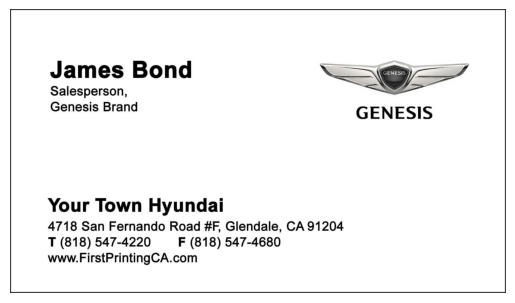

In [4]:
# Load Image

image = cv2.imread("data/Selected/051.jpeg")
plt.imshow(image)
plt.axis("off")

In [5]:
# Extract Data from Text using Pytesseract

tess_data = pytesseract.image_to_data(image)
print(tess_data)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1604	917	-1	
2	1	1	0	0	0	130	167	1353	95	-1	
3	1	1	1	0	0	130	167	1353	95	-1	
4	1	1	1	1	0	130	167	1353	95	-1	
5	1	1	1	1	1	130	167	237	57	96	James
5	1	1	1	1	2	398	167	188	57	95	Bond
5	1	1	1	1	3	1103	180	380	82	0	Saaqg—
2	1	2	0	0	0	132	248	245	39	-1	
3	1	2	1	0	0	132	248	245	39	-1	
4	1	2	1	1	0	132	248	245	39	-1	
5	1	2	1	1	1	132	248	245	39	96	Salesperson,
2	1	3	0	0	0	132	299	1231	61	-1	
3	1	3	1	0	0	132	299	1234	61	-1	
4	1	3	1	1	0	132	299	1231	61	-1	
5	1	3	1	1	1	132	299	154	32	96	Genesis
5	1	3	1	1	2	303	300	108	31	96	Brand
5	1	3	1	1	3	1120	308	243	52	96	GENESIS
2	1	4	0	0	0	122	610	956	216	-1	
3	1	4	1	0	0	122	610	566	57	-1	
4	1	4	1	1	0	122	610	566	57	-1	
5	1	4	1	1	1	122	610	135	46	96	Your
5	1	4	1	1	2	276	611	148	45	96	Town
5	1	4	1	1	3	451	610	237	57	96	Hyundai
3	1	4	2	0	0	123	685	955	141	-1	
4	1	4	2	1	0	123	685	955	37	-1	
5	1	4	2	1	1	123	685	93	32	96	4718
5	1	4	2	1	2	232	685	72	32	96	San
5	1	4	2

In [6]:
# Convert into DataFrame
tessList = list(map(lambda x: x.split("\t"), tess_data.split("\n")))

df = pd.DataFrame(tessList[1:], columns=tessList[0])

# remove missing values
df.dropna(inplace=True)

# clean text
df["text"] = df["text"].apply(clean_text)

df[14:22]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
14,5,1,3,1,1,1,132,299,154,32,96,genesis
15,5,1,3,1,1,2,303,300,108,31,96,brand
16,5,1,3,1,1,3,1120,308,243,52,96,genesis
17,2,1,4,0,0,0,122,610,956,216,-1,
18,3,1,4,1,0,0,122,610,566,57,-1,
19,4,1,4,1,1,0,122,610,566,57,-1,
20,5,1,4,1,1,1,122,610,135,46,96,your
21,5,1,4,1,1,2,276,611,148,45,96,town


In [7]:
# Convert Data into Content
df_clean = df.query("text != ''")
content = " ".join([w for w in df_clean["text"]]) # it will take and join each word by one space
print(content)

james bond saaqg— salesperson, genesis brand genesis your town hyundai 4718 san fernando road f, glendale, ca 91204 t 818 547-4220 f 818 547-4680 www.firstprintingca.com


In [8]:
# Get Predictions from NER Model
doc = model_ner(content)

spacy.displacy.serve(doc, style="ent") # ent -> entities

D:\ANACONDA\envs\docscanner\lib\site-packages\spacy\displacy\__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [9]:
spacy.displacy.render(doc, style="ent")

### Tagging

In [10]:
doc.to_json()

{'text': 'james bond saaqg— salesperson, genesis brand genesis your town hyundai 4718 san fernando road f, glendale, ca 91204 t 818 547-4220 f 818 547-4680 www.firstprintingca.com',
 'ents': [{'start': 0, 'end': 5, 'label': 'B-NAME'},
  {'start': 6, 'end': 10, 'label': 'I-NAME'},
  {'start': 11, 'end': 38, 'label': 'B-DES'},
  {'start': 45, 'end': 52, 'label': 'B-ORG'},
  {'start': 118, 'end': 121, 'label': 'B-PHONE'},
  {'start': 122, 'end': 130, 'label': 'I-PHONE'},
  {'start': 146, 'end': 169, 'label': 'B-WEB'}],
 'tokens': [{'id': 0, 'start': 0, 'end': 5},
  {'id': 1, 'start': 6, 'end': 10},
  {'id': 2, 'start': 11, 'end': 16},
  {'id': 3, 'start': 16, 'end': 17},
  {'id': 4, 'start': 18, 'end': 29},
  {'id': 5, 'start': 29, 'end': 30},
  {'id': 6, 'start': 31, 'end': 38},
  {'id': 7, 'start': 39, 'end': 44},
  {'id': 8, 'start': 45, 'end': 52},
  {'id': 9, 'start': 53, 'end': 57},
  {'id': 10, 'start': 58, 'end': 62},
  {'id': 11, 'start': 63, 'end': 70},
  {'id': 12, 'start': 71,

In [11]:
docjson = doc.to_json()
docjson.keys()

dict_keys(['text', 'ents', 'tokens'])

In [12]:
doc_text = docjson["text"]
doc_text

'james bond saaqg— salesperson, genesis brand genesis your town hyundai 4718 san fernando road f, glendale, ca 91204 t 818 547-4220 f 818 547-4680 www.firstprintingca.com'

In [13]:
dataframe_tokens = pd.DataFrame(docjson["tokens"])
dataframe_tokens.head()

,id,start,end
0,0,0,5
1,1,6,10
2,2,11,16
3,3,16,17
4,4,18,29


In [14]:
dataframe_tokens["token"] = dataframe_tokens[["start", "end"]].apply(lambda x:doc_text[x[0]:x[1]], axis=1)

dataframe_tokens.head(10)

,id,start,end,token
0,0,0,5,james
1,1,6,10,bond
2,2,11,16,saaqg
3,3,16,17,—
4,4,18,29,salesperson
5,5,29,30,","
6,6,31,38,genesis
7,7,39,44,brand
8,8,45,52,genesis
9,9,53,57,your


In [15]:
doc_text[18:29]

'salesperson'

In [16]:
pd.DataFrame(docjson["ents"])

,start,end,label
0,0,5,B-NAME
1,6,10,I-NAME
2,11,38,B-DES
3,45,52,B-ORG
4,118,121,B-PHONE
5,122,130,I-PHONE
6,146,169,B-WEB


In [17]:
pd.DataFrame(docjson["ents"])[["start", "label"]]

,start,label
0,0,B-NAME
1,6,I-NAME
2,11,B-DES
3,45,B-ORG
4,118,B-PHONE
5,122,I-PHONE
6,146,B-WEB


In [18]:
doc_ents = pd.DataFrame(docjson["ents"])[["start", "label"]]
dataframe_tokens = pd.merge(dataframe_tokens, doc_ents, how="left", on="start")

dataframe_tokens.head(10)

,id,start,end,token,label
0,0,0,5,james,B-NAME
1,1,6,10,bond,I-NAME
2,2,11,16,saaqg,B-DES
3,3,16,17,—,NaN
4,4,18,29,salesperson,NaN
5,5,29,30,",",NaN
6,6,31,38,genesis,NaN
7,7,39,44,brand,NaN
8,8,45,52,genesis,B-ORG
9,9,53,57,your,NaN


In [19]:
dataframe_tokens.fillna("O", inplace=True)

dataframe_tokens.head(10)

,id,start,end,token,label
0,0,0,5,james,B-NAME
1,1,6,10,bond,I-NAME
2,2,11,16,saaqg,B-DES
3,3,16,17,—,O
4,4,18,29,salesperson,O
5,5,29,30,",",O
6,6,31,38,genesis,O
7,7,39,44,brand,O
8,8,45,52,genesis,B-ORG
9,9,53,57,your,O


In [20]:
df_clean.head()

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,130,167,237,57,96,james
5,5,1,1,1,1,2,398,167,188,57,95,bond
6,5,1,1,1,1,3,1103,180,380,82,0,saaqg—
10,5,1,2,1,1,1,132,248,245,39,96,"salesperson,"
14,5,1,3,1,1,1,132,299,154,32,96,genesis


In [21]:
# join label to df_clean dataframe
df_clean["text"].apply(lambda x: len(x)+1)

4      6
5      5
6      7
10    13
14     8
15     6
16     8
20     5
21     5
22     8
25     5
26     4
27     9
28     5
29     3
30    10
31     3
32     6
34     2
35     4
36     9
37     2
38     4
39     9
41    24
Name: text, dtype: int64

In [22]:
# join label to df_clean dataframe
df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1

4       5
5      10
6      17
10     30
14     38
15     44
16     52
20     57
21     62
22     70
25     75
26     79
27     88
28     93
29     96
30    106
31    109
32    115
34    117
35    121
36    130
37    132
38    136
39    145
41    169
Name: text, dtype: int64

In [23]:
df_clean["end"] = df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1
df_clean["start"] = df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)

df_clean.head(10)

C:\Users\my\AppData\Local\Temp\ipykernel_1272\1712280030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["end"] = df_clean["text"].apply(lambda x: len(x)+1).cumsum() - 1
C:\Users\my\AppData\Local\Temp\ipykernel_1272\1712280030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["start"] = df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start
4,5,1,1,1,1,1,130,167,237,57,96,james,5,0
5,5,1,1,1,1,2,398,167,188,57,95,bond,10,6
6,5,1,1,1,1,3,1103,180,380,82,0,saaqg—,17,11
10,5,1,2,1,1,1,132,248,245,39,96,"salesperson,",30,18
14,5,1,3,1,1,1,132,299,154,32,96,genesis,38,31
15,5,1,3,1,1,2,303,300,108,31,96,brand,44,39
16,5,1,3,1,1,3,1120,308,243,52,96,genesis,52,45
20,5,1,4,1,1,1,122,610,135,46,96,your,57,53
21,5,1,4,1,1,2,276,611,148,45,96,town,62,58
22,5,1,4,1,1,3,451,610,237,57,96,hyundai,70,63


In [24]:
# to get correct start position
df_clean[["text", "end"]].apply(lambda x: x[1] - len(x[0]), axis=1)

4       0
5       6
6      11
10     18
14     31
15     39
16     45
20     53
21     58
22     63
25     71
26     76
27     80
28     89
29     94
30     97
31    107
32    110
34    116
35    118
36    122
37    131
38    133
39    137
41    146
dtype: int64

In [25]:
# inner join with start 

dataframe_info = pd.merge(df_clean, dataframe_tokens[["start", "token", "label"]], how="inner", on="start")
dataframe_info.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
0,5,1,1,1,1,1,130,167,237,57,96,james,5,0,james,B-NAME
1,5,1,1,1,1,2,398,167,188,57,95,bond,10,6,bond,I-NAME
2,5,1,1,1,1,3,1103,180,380,82,0,saaqg—,17,11,saaqg,B-DES
3,5,1,2,1,1,1,132,248,245,39,96,"salesperson,",30,18,salesperson,O
4,5,1,3,1,1,1,132,299,154,32,96,genesis,38,31,genesis,O
5,5,1,3,1,1,2,303,300,108,31,96,brand,44,39,brand,O
6,5,1,3,1,1,3,1120,308,243,52,96,genesis,52,45,genesis,B-ORG
7,5,1,4,1,1,1,122,610,135,46,96,your,57,53,your,O
8,5,1,4,1,1,2,276,611,148,45,96,town,62,58,town,O
9,5,1,4,1,1,3,451,610,237,57,96,hyundai,70,63,hyundai,O


In [26]:
dataframe_info.tail(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,end,start,token,label
15,5,1,4,2,1,6,698,685,179,37,95,"glendale,",106,97,glendale,O
16,5,1,4,2,1,7,895,685,57,32,95,ca,109,107,ca,O
17,5,1,4,2,1,8,963,685,115,32,96,91204,115,110,91204,O
18,5,1,4,2,2,1,124,737,24,30,93,t,117,116,t,O
19,5,1,4,2,2,2,164,736,97,40,95,818,121,118,818,B-PHONE
20,5,1,4,2,2,3,276,736,178,32,96,547-4220,130,122,547,I-PHONE
21,5,1,4,2,2,4,546,736,21,31,93,f,132,131,f,O
22,5,1,4,2,2,5,584,736,97,40,96,818,136,133,818,O
23,5,1,4,2,2,6,696,736,178,32,96,547-4680,145,137,547,O
24,5,1,4,2,3,1,123,787,481,39,76,www.firstprintingca.com,169,146,www.firstprintingca.com,B-WEB
